### Module Import

In [1]:
from pycaret import *

In [2]:
import sklearn

In [3]:
import pickle

In [4]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.2.


In [5]:
# !pip install scikit-learn==0.23.2 --user

In [6]:
# !pip uninstall scikit-learn -y
# !pip install -U pycaret scikit-learn --user

In [7]:
from sklearn.utils import class_weight

In [8]:
from pycaret.classification import *
import pycaret.classification as pycc

In [9]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import model_selection

%matplotlib inline

In [10]:
%cd D:/wildfire project

D:\wildfire project


In [11]:
os.listdir()

['.ipynb_checkpoints',
 'blend_model_knn_lr_rfbag.pkl',
 'Excel formats',
 'Feature engineering.ipynb',
 'Final Presentation',
 'Fire weather fia merge.ipynb',
 'fire1992_merged.csv',
 'fire1993_merged.csv',
 'fire1994_merged.csv',
 'fire1995_merged.csv',
 'fire1996_merged.csv',
 'fire1997_merged.csv',
 'fire1998_merged.csv',
 'fire1999_merged.csv',
 'fire2000_merged.csv',
 'fire2001_merged.csv',
 'fire2002_merged.csv',
 'fire2003_merged.csv',
 'fire2004_merged.csv',
 'fire2005_merged.csv',
 'fire2006_merged.csv',
 'fire2007_merged.csv',
 'fire2008_merged.csv',
 'fire2009_merged.csv',
 'fire2010_merged.csv',
 'fire2011_merged.csv',
 'fire2012_merged.csv',
 'fire2013_merged.csv',
 'fire2014_merged.csv',
 'fire2015_merged.csv',
 'logs.log',
 'merged file transformation',
 'merged_duration.csv',
 'Merged_dur_firestations.csv',
 'Pycaret classification.ipynb',
 'requred column from FIA.xlsx',
 'saved_blended_model.pkl',
 'sustainability-14-10107-v2 (2).pdf',
 'tuned_knn.pkl',
 'tuned_lr.pk

### Read files

In [47]:
df = pd.concat(map(pd.read_csv, [ 'fire1992_merged.csv',
 'fire1993_merged.csv',
 'fire1994_merged.csv',
 'fire1995_merged.csv',
 'fire1997_merged.csv',
 'fire1999_merged.csv',
 'fire1998_merged.csv',
 'fire1998_merged.csv',
 'fire2001_merged.csv',
 'fire2002_merged.csv',
 'fire2003_merged.csv',
 'fire2004_merged.csv',
 'fire1996_merged.csv',
 'fire2005_merged.csv',
 'fire2007_merged.csv',
 'fire2010_merged.csv',
 'fire2006_merged.csv',
 'fire2009_merged.csv',
 'fire2008_merged.csv',
 'fire2012_merged.csv',
 'fire2011_merged.csv',
 'fire2014_merged.csv',
 'fire2013_merged.csv',
 'fire2015_merged.csv']))

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141420 entries, 0 to 8303
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0.1        141420 non-null  int64  
 1   Unnamed: 0          141420 non-null  int64  
 2   FOD_ID              141420 non-null  int64  
 3   FPA_ID              141420 non-null  object 
 4   FIRE_NAME           81971 non-null   object 
 5   FIRE_YEAR           141420 non-null  int64  
 6   DISCOVERY_DOY       141420 non-null  int64  
 7   DISCOVERY_TIME      141420 non-null  int64  
 8   STAT_CAUSE_CODE     141420 non-null  float64
 9   STAT_CAUSE_DESCR    141420 non-null  object 
 10  CONT_DOY            141420 non-null  int64  
 11  CONT_TIME           141420 non-null  int64  
 12  FIRE_SIZE           141420 non-null  float64
 13  FIRE_SIZE_CLASS     141420 non-null  object 
 14  LATITUDE            141420 non-null  float64
 15  LONGITUDE           141420 non-null 

In [49]:
df

,Unnamed: 0.1,Unnamed: 0,FOD_ID,FPA_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,...,d_min,c_month,c_day,c_hour,c_min,temp_start,dewPointTemp_start,RelHumidity_start,Windspeed_start,FeltTemp_start
0,0,52738,53173,FS-276639,NaN,1992,99,1305,7.0,Arson,...,5,4,9,14,40,77.080864,62.354927,52.192808,10.306146,77.080864
1,1,52739,53174,FS-276641,NaN,1992,133,1400,7.0,Arson,...,0,5,13,19,0,87.979259,72.273413,51.371132,11.006068,87.979259
2,2,52740,53175,FS-276642,NaN,1992,171,1830,7.0,Arson,...,30,6,21,2,0,91.937453,74.402587,48.549445,11.629194,91.937453
3,3,52741,53176,FS-276644,NaN,1992,214,1330,7.0,Arson,...,30,8,2,17,45,89.245916,73.975209,53.836260,12.505792,89.245916
4,4,52742,53177,FS-276646,NaN,1992,244,815,7.0,Arson,...,15,9,2,11,30,93.795612,74.671379,43.929501,14.549308,93.795612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8299,8299,1856360,300289501,SFO-2015TXTXS3689,COMANCHE,2015,292,-1,13.0,Missing/Undefined,...,-1,10,19,18,20,83.107444,42.881027,20.688935,11.540721,83.107444
8300,8300,1856399,300289541,SFO-2015TXTXS3723,6300,2015,294,1948,13.0,Missing/Undefined,...,48,10,21,22,17,84.382203,65.120486,40.139739,11.107564,84.382203
8301,8301,1856439,300289582,SFO-2015TXTXS3737,HOUSE,2015,301,1150,13.0,Missing/Undefined,...,50,10,28,12,55,75.767986,57.497257,38.054443,17.529314,75.767986
8302,8302,1859961,300293785,ICS209_2015_2714938,CAVANAL FIRE,2015,40,1645,13.0,Missing/Undefined,...,45,-1,-1,-1,-1,74.511573,53.259333,26.150232,14.466976,74.511573


In [50]:
# q = df["FIRE_SIZE"].quantile(0.9999)
# df = df[df["FIRE_SIZE"] < q]

In [51]:
df["FIRE_SIZE"].max()

479549.0

In [52]:
model_df_temp = df[['d_month','temp_start','dewPointTemp_start','RelHumidity_start','Windspeed_start','FIRE_SIZE_CLASS']]

In [53]:
model_df_temp.head()

,d_month,temp_start,dewPointTemp_start,RelHumidity_start,Windspeed_start,FIRE_SIZE_CLASS
0,4,77.080864,62.354927,52.192808,10.306146,C
1,5,87.979259,72.273413,51.371132,11.006068,D
2,6,91.937453,74.402587,48.549445,11.629194,C
3,8,89.245916,73.975209,53.836260,12.505792,C
4,9,93.795612,74.671379,43.929501,14.549308,D


In [54]:
model_df_temp.describe()

,d_month,temp_start,dewPointTemp_start,RelHumidity_start,Windspeed_start
count,141420.000000,139909.000000,139909.000000,139909.000000,139909.000000
mean,5.881636,82.027996,56.702342,31.601681,14.508708
std,3.388156,14.065912,15.413009,12.666666,4.631890
min,1.000000,17.818786,-0.134739,0.847965,0.062178
25%,3.000000,71.885764,45.172706,22.298931,11.188464
50%,6.000000,83.145084,60.926265,30.271737,13.816128
75%,9.000000,94.165167,69.876759,39.514189,17.074093
max,12.000000,126.803348,90.786811,99.754396,113.828866


In [55]:
model_df_temp = model_df_temp.dropna()

In [56]:
from sklearn import preprocessing
model_df_temp.iloc[:,1:5] = preprocessing.normalize(model_df_temp.iloc[:,1:5])

In [57]:
model_df_temp.head()

,d_month,temp_start,dewPointTemp_start,RelHumidity_start,Windspeed_start,FIRE_SIZE_CLASS
0,4,0.685064,0.554186,0.463869,0.091597,C
1,5,0.701617,0.576366,0.409674,0.087771,D
2,6,0.716155,0.579565,0.378180,0.090587,C
3,8,0.694949,0.576038,0.419218,0.097381,C
4,9,0.729868,0.581053,0.341836,0.113215,D


In [58]:
model_df_temp['Label_temp'] = pd.cut(x=model_df_temp['temp_start'],
                     bins=[0,0.25,0.50,0.75,1],
                     labels=['vl','l','h','vh'])
model_df_temp['Label_dew'] = pd.cut(x=model_df_temp['dewPointTemp_start'],
                     bins=[0,0.25,0.50,0.75,1],
                     labels=['vl','l','h','vh'])
model_df_temp['Label_hum'] = pd.cut(x=model_df_temp['RelHumidity_start'],
                     bins=[0,0.25,0.50,0.75,1],
                     labels=['vl','l','h','vh'])
model_df_temp['Label_ws'] = pd.cut(x=model_df_temp['Windspeed_start'],
                     bins=[0,0.25,0.50,0.75,1],
                     labels=['vl','l','h','vh'])

In [59]:
model_df_temp.head()

,d_month,temp_start,dewPointTemp_start,RelHumidity_start,Windspeed_start,FIRE_SIZE_CLASS,Label_temp,Label_dew,Label_hum,Label_ws
0,4,0.685064,0.554186,0.463869,0.091597,C,h,h,l,vl
1,5,0.701617,0.576366,0.409674,0.087771,D,h,h,l,vl
2,6,0.716155,0.579565,0.378180,0.090587,C,h,h,l,vl
3,8,0.694949,0.576038,0.419218,0.097381,C,h,h,l,vl
4,9,0.729868,0.581053,0.341836,0.113215,D,h,h,l,vl


In [60]:
model_df_temp = model_df_temp.drop(['temp_start','dewPointTemp_start','RelHumidity_start','Windspeed_start'], axis=1)

In [61]:
model_df_temp.head()

,d_month,FIRE_SIZE_CLASS,Label_temp,Label_dew,Label_hum,Label_ws
0,4,C,h,h,l,vl
1,5,D,h,h,l,vl
2,6,C,h,h,l,vl
3,8,C,h,h,l,vl
4,9,D,h,h,l,vl


In [62]:
model_df_temp['FIRE_SIZE_CLASS'].value_counts()

B    90462
C    25017
A    17935
D     3720
E     1747
F      792
G      236
Name: FIRE_SIZE_CLASS, dtype: int64

In [27]:
model_df_temp = model_df_temp.dropna()

In [28]:
le = LabelEncoder()
model_df_temp["Label_temp"] = le.fit_transform(model_df_temp["Label_temp"])
model_df_temp["Label_dew"] = le.fit_transform(model_df_temp["Label_dew"])
model_df_temp["Label_hum"] = le.fit_transform(model_df_temp["Label_hum"])
model_df_temp["Label_ws"] = le.fit_transform(model_df_temp["Label_ws"])
model_df_temp["FIRE_SIZE_CLASS"] = le.fit_transform(model_df_temp["FIRE_SIZE_CLASS"])


In [29]:
model_df_temp.head()

,d_month,FIRE_SIZE_CLASS,Label_temp,Label_dew,Label_hum,Label_ws
0,4,2,0,0,1,2
1,5,3,0,0,1,2
2,6,2,0,0,1,2
3,8,2,0,0,1,2
4,9,3,0,0,1,2


In [30]:
class_weights = class_weight.compute_class_weight('balanced',classes = np.unique(model_df_temp.FIRE_SIZE_CLASS),y = model_df_temp.FIRE_SIZE_CLASS)

In [31]:
class_weights

array([ 1.11446733,  0.22094202,  0.79893101,  5.37281106, 11.44067381,
       25.23593074, 84.69007264])

In [32]:
a = {}
for i in range(len(class_weights)):
    a[i] = class_weights[i]

In [33]:
a

{0: 1.1144673326004875,
 1: 0.22094202143283526,
 2: 0.7989310126257002,
 3: 5.372811059907834,
 4: 11.440673808160929,
 5: 25.235930735930737,
 6: 84.69007263922518}

In [34]:
clf_fire_size_class = setup(data=model_df_temp, target='FIRE_SIZE_CLASS', categorical_features = ['d_month','Label_temp','Label_dew','Label_hum','Label_ws'], fix_imbalance = False, n_jobs=1)

,Description,Value
0,session_id,2706
1,Target,FIRE_SIZE_CLASS
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(139908, 6)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [35]:
# clf_fire_size_class

In [72]:
available_models = pycc.models()
available_models

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [101]:
qda_clf = pycc.create_model('qda', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0265,0.0000,0.1429,0.0007,0.0014,0.0000,0.0000
1,0.0264,0.0000,0.1429,0.0007,0.0014,0.0000,0.0000
2,0.0265,0.0000,0.1429,0.0007,0.0014,0.0000,0.0000
3,0.0265,0.0000,0.1429,0.0007,0.0014,0.0000,0.0000
4,0.0265,0.0000,0.1429,0.0007,0.0014,0.0000,0.0000
Mean,0.0265,0.0000,0.1429,0.0007,0.0014,0.0000,0.0000
Std,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [131]:
svm_clf = pycc.create_model('svm', fold = 5, class_weight = a)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5095,0.0000,0.2406,0.4521,0.4698,0.0279,0.0306
1,0.3275,0.0000,0.1824,0.4769,0.3750,0.0150,0.0163
2,0.1321,0.0000,0.2096,0.4706,0.1215,-0.0021,-0.0030
3,0.3736,0.0000,0.1726,0.4663,0.3995,-0.0048,-0.0052
4,0.3189,0.0000,0.2148,0.4938,0.3771,0.0274,0.0305
Mean,0.3323,0.0000,0.2040,0.4719,0.3486,0.0127,0.0139
Std,0.1211,0.0000,0.0243,0.0136,0.1186,0.0140,0.0155


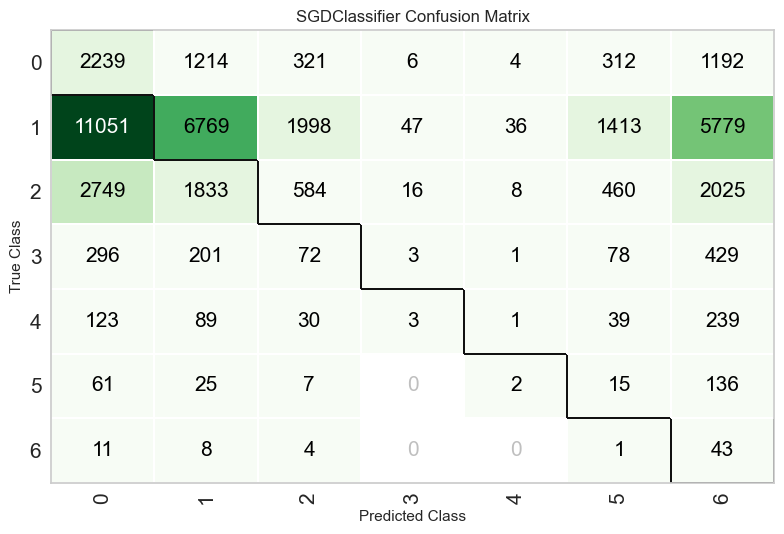

In [298]:
plot_model(svm_clf, plot = "confusion_matrix")

In [275]:
tuned_svm = tune_model(svm_clf, optimize = 'Prec.', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2571,0.0000,0.2364,0.4914,0.3042,0.0153,0.0183
1,0.0941,0.0000,0.1895,0.4883,0.1460,0.0049,0.0088
2,0.1571,0.0000,0.2094,0.5012,0.1201,-0.0008,-0.0013
Mean,0.1694,0.0000,0.2118,0.4936,0.1901,0.0065,0.0086
Std,0.0671,0.0000,0.0192,0.0055,0.0814,0.0067,0.0080


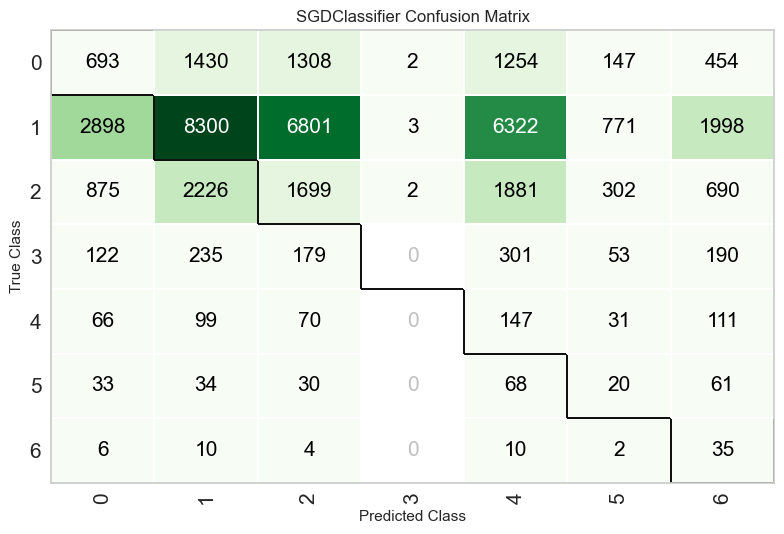

In [276]:
plot_model(tuned_svm, plot = "confusion_matrix")

In [74]:
lr_clf = pycc.create_model('lr', fold = 5, class_weight = a)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2211,0.5389,0.2162,0.5009,0.2836,0.0245,0.0297
1,0.2267,0.5391,0.2238,0.4993,0.2854,0.0246,0.0297
2,0.2145,0.5375,0.2548,0.4940,0.2731,0.0209,0.0256
3,0.2286,0.5362,0.2353,0.4843,0.2885,0.0168,0.0202
4,0.2268,0.5366,0.2312,0.4938,0.2880,0.0209,0.0250
Mean,0.2235,0.5377,0.2323,0.4944,0.2837,0.0215,0.0260
Std,0.0052,0.0012,0.0130,0.0058,0.0056,0.0029,0.0035


In [75]:
tuned_lr = tune_model(lr_clf, n_iter=10,optimize='Accuracy', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6467,0.5580,0.1429,0.4182,0.5079,0.0000,0.0000
1,0.6467,0.5514,0.1429,0.4182,0.5079,0.0000,0.0000
2,0.6467,0.5525,0.1429,0.4182,0.5079,0.0000,0.0000
Mean,0.6467,0.5540,0.1429,0.4182,0.5079,0.0000,0.0000
Std,0.0000,0.0029,0.0000,0.0000,0.0000,0.0000,0.0000


In [271]:
tuned_lr_prec = tune_model(lr_clf, n_iter=10,optimize='Prec.', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2282,0.5369,0.2448,0.5004,0.2916,0.0246,0.0295
1,0.2270,0.5370,0.2280,0.4974,0.2903,0.0221,0.0264
2,0.2482,0.5355,0.2345,0.4918,0.3145,0.0194,0.0228
Mean,0.2345,0.5365,0.2358,0.4965,0.2988,0.0220,0.0262
Std,0.0098,0.0007,0.0069,0.0036,0.0111,0.0021,0.0027


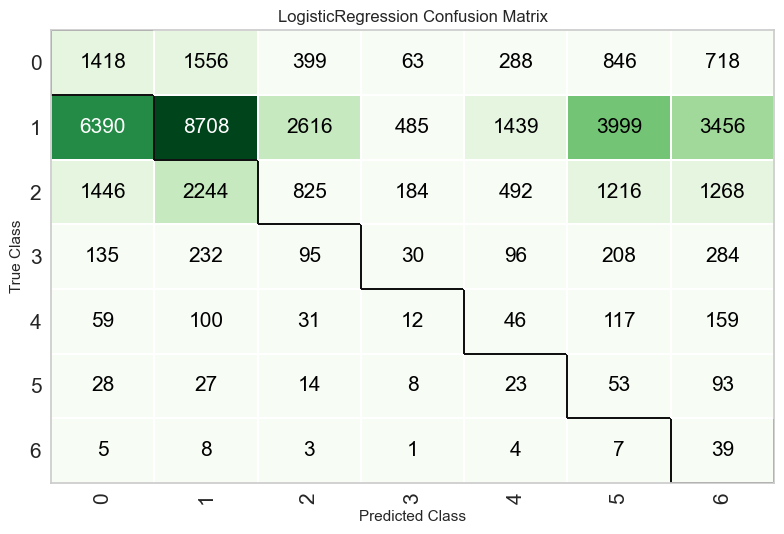

In [272]:
plot_model(tuned_lr_prec, plot = "confusion_matrix")

In [240]:
save_model(tuned_lr, 'tuned_lr') 

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['d_month',
                                                             'Label_temp',
                                                             'Label_dew',
                                                             'Label_hum',
                                                             'Label_ws'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='FIRE_SIZE_CLASS',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 f...
                 ('feature_select', 'passthrough'), ('f

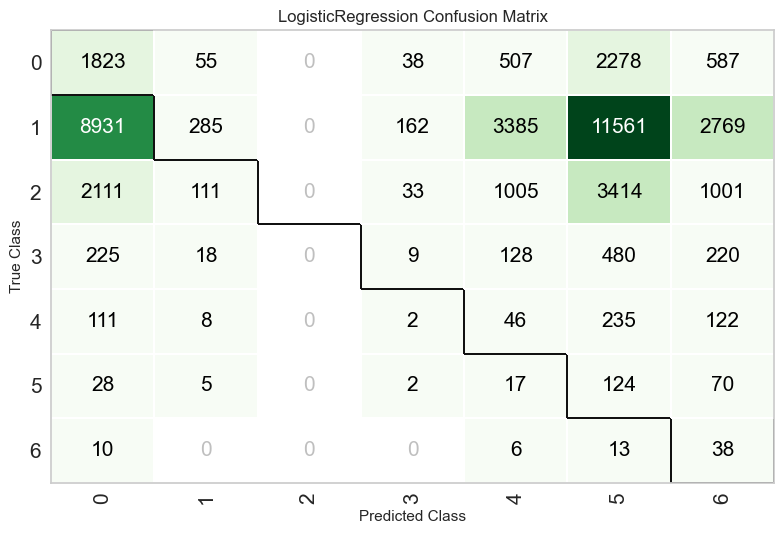

In [270]:
plot_model(lr_clf, plot = "confusion_matrix")

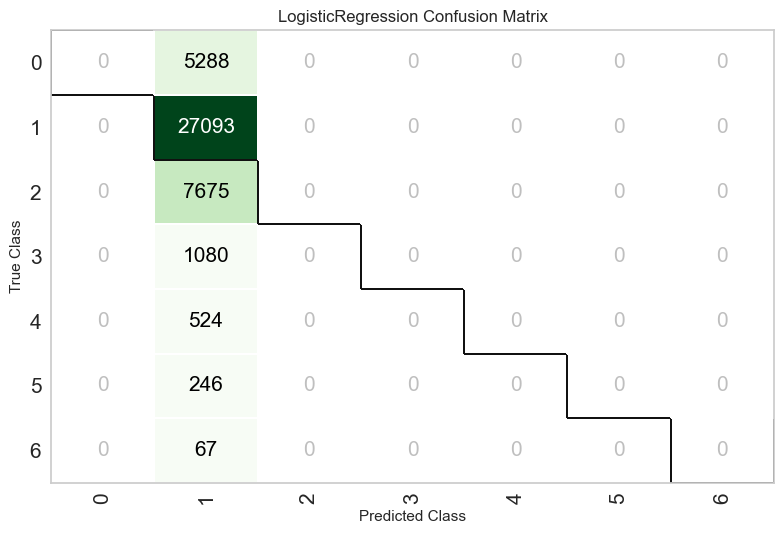

In [268]:
plot_model(tuned_lr, plot = "confusion_matrix")

In [36]:
rf_clf = pycc.create_model('rf', fold = 5, class_weight = a)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2247,0.5365,0.2293,0.4895,0.2909,0.0181,0.0214
1,0.2483,0.5404,0.2258,0.4925,0.3150,0.0214,0.0247
2,0.2244,0.5376,0.2577,0.5010,0.2764,0.0259,0.0315
3,0.2483,0.5366,0.2226,0.4950,0.3133,0.0264,0.0306
4,0.2627,0.5365,0.2464,0.4908,0.3282,0.0258,0.0296
Mean,0.2417,0.5375,0.2363,0.4938,0.3048,0.0235,0.0276
Std,0.0149,0.0015,0.0135,0.0041,0.0186,0.0033,0.0039


In [292]:
rf_clf_wb = pycc.create_model('rf', fold = 5, class_weight = "balanced")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2108,0.5360,0.2355,0.4890,0.2712,0.0185,0.0223
1,0.2329,0.5388,0.2223,0.5026,0.2964,0.0269,0.0319
2,0.2174,0.5412,0.2205,0.5013,0.2744,0.0247,0.0300
3,0.2900,0.5370,0.2445,0.4944,0.3547,0.0280,0.0315
4,0.2375,0.5366,0.2462,0.4864,0.3028,0.0177,0.0207
Mean,0.2377,0.5379,0.2338,0.4947,0.2999,0.0232,0.0273
Std,0.0279,0.0019,0.0108,0.0064,0.0300,0.0043,0.0048


In [37]:
tuned_rf_wb_Pre = tune_model(rf_clf_wb, optimize = 'Prec.', fold=3)

NameError: name 'rf_clf_wb' is not defined

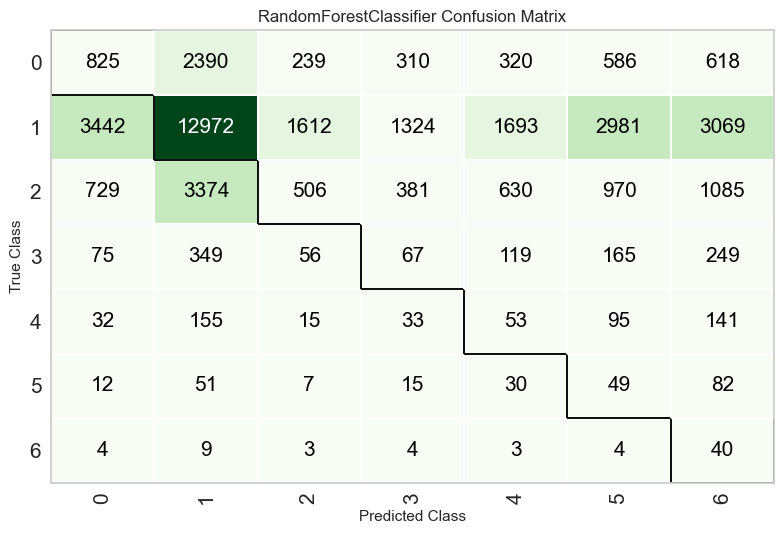

In [296]:
plot_model(tuned_rf_wb_Pre, plot = "confusion_matrix")

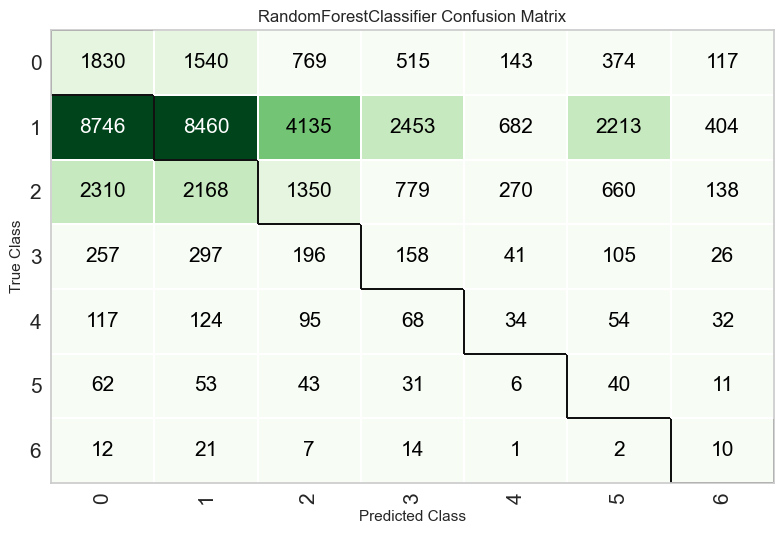

In [277]:
plot_model(rf_clf, plot = "confusion_matrix")

In [38]:
tuned_rf_prec = tune_model(rf_clf, n_iter=10,optimize='Prec.', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2916,0.5366,0.2505,0.4923,0.3584,0.0262,0.0293
1,0.2728,0.5367,0.2315,0.5010,0.3432,0.0306,0.0351
2,0.2985,0.5371,0.2440,0.4942,0.3641,0.0288,0.0323
Mean,0.2876,0.5368,0.2420,0.4958,0.3552,0.0285,0.0322
Std,0.0109,0.0002,0.0079,0.0038,0.0088,0.0018,0.0024


In [280]:
tuned_rf_prec_AUC = tune_model(tuned_rf_prec, n_iter=10,optimize='AUC', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2867,0.5369,0.2458,0.4972,0.3545,0.0290,0.0330
1,0.2954,0.5376,0.2343,0.4998,0.3601,0.0332,0.0373
2,0.3000,0.5368,0.2456,0.4924,0.3643,0.0250,0.0280
Mean,0.2940,0.5371,0.2419,0.4965,0.3596,0.0291,0.0328
Std,0.0055,0.0004,0.0054,0.0031,0.0040,0.0034,0.0038


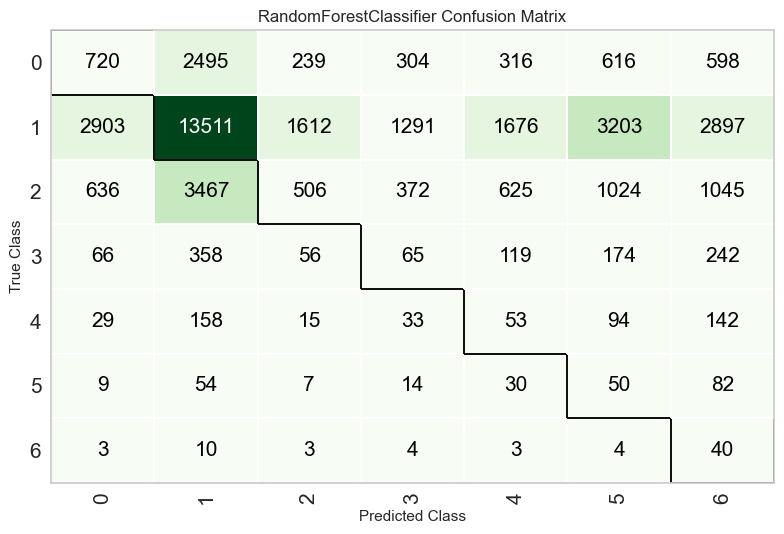

In [297]:
plot_model(tuned_rf_prec, plot = "confusion_matrix")

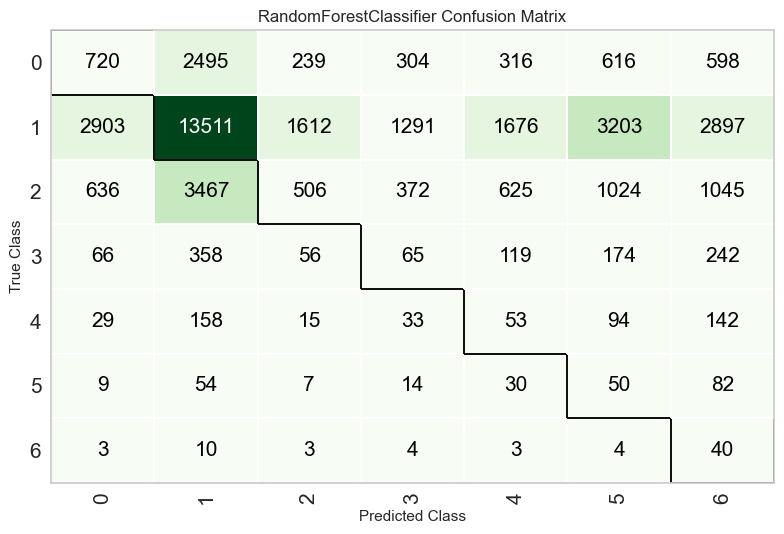

In [279]:
plot_model(tuned_rf_prec, plot = "confusion_matrix")

In [136]:
tuned_rf = tune_model(rf_clf, n_iter=10,optimize='Accuracy', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6467,0.5000,0.1429,0.4182,0.5079,0.0000,0.0000
1,0.6467,0.5000,0.1429,0.4182,0.5079,0.0000,0.0000
2,0.6467,0.5000,0.1429,0.4182,0.5079,0.0000,0.0000
Mean,0.6467,0.5000,0.1429,0.4182,0.5079,0.0000,0.0000
Std,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [241]:
save_model(tuned_rf, 'tuned_rf') 

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['d_month',
                                                             'Label_temp',
                                                             'Label_dew',
                                                             'Label_hum',
                                                             'Label_ws'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='FIRE_SIZE_CLASS',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 f...
                  RandomForestClassifier(bootstrap=True

In [137]:
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.2, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=270, n_jobs=1,
                       oob_score=False, random_state=6732, verbose=0,
                       warm_start=False)

In [138]:
rf_bag = pycc.ensemble_model(tuned_rf, method="Bagging", fold=5, n_estimators=270)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6467,0.5000,0.1429,0.4182,0.5080,0.0000,0.0000
1,0.6467,0.5000,0.1429,0.4182,0.5079,0.0000,0.0000
2,0.6467,0.5000,0.1429,0.4182,0.5079,0.0000,0.0000
3,0.6467,0.5000,0.1429,0.4182,0.5079,0.0000,0.0000
4,0.6467,0.5000,0.1429,0.4182,0.5079,0.0000,0.0000
Mean,0.6467,0.5000,0.1429,0.4182,0.5079,0.0000,0.0000
Std,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [64]:
plot_model(rf_bag, plot = "confusion_matrix")

NameError: name 'rf_bag' is not defined

In [39]:
rf_bag_pred= pycc.ensemble_model(rf_clf,method="Boosting",fold=5,n_estimators=270)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2124,0.5201,0.2233,0.4910,0.2765,0.0177,0.0211
1,0.2365,0.5227,0.2193,0.4921,0.3006,0.0196,0.0230
2,0.2179,0.5219,0.2570,0.5036,0.2695,0.0263,0.0322
3,0.2078,0.5175,0.2249,0.4925,0.2656,0.0210,0.0255
4,0.2632,0.5182,0.2475,0.4907,0.3284,0.0258,0.0296
Mean,0.2276,0.5201,0.2344,0.4940,0.2881,0.0221,0.0263
Std,0.0203,0.0020,0.0150,0.0048,0.0235,0.0034,0.0041


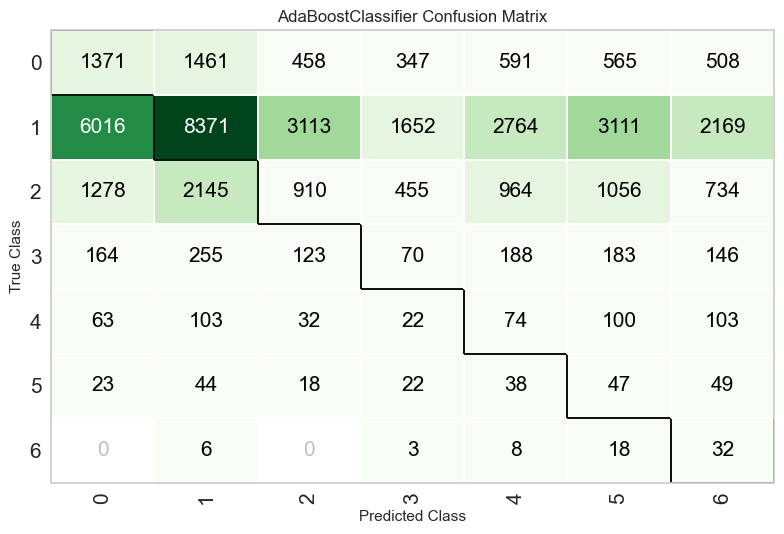

In [63]:
plot_model(rf_bag_pred, plot = "confusion_matrix")

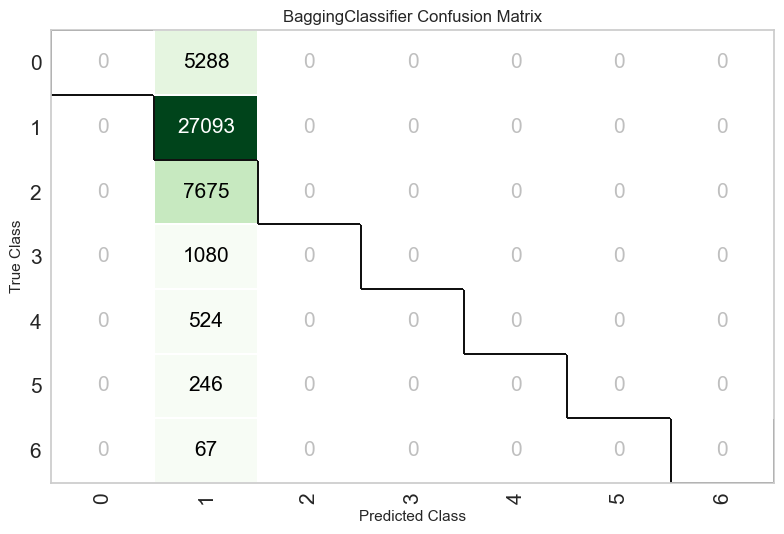

In [299]:
plot_model(rf_bag, plot = "confusion_matrix")

In [134]:
knn_clf = pycc.create_model('knn', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6075,0.0000,0.1479,0.4709,0.5112,-0.0012,-0.0017
1,0.5638,0.5068,0.1446,0.4694,0.5014,0.0057,0.0063
2,0.6007,0.5098,0.1437,0.4698,0.5114,0.0029,0.0038
3,0.6079,0.5122,0.1456,0.4752,0.5129,0.0114,0.0155
4,0.6057,0.5101,0.1439,0.4734,0.5075,0.0068,0.0093
Mean,0.5971,0.4078,0.1451,0.4718,0.5089,0.0051,0.0067
Std,0.0169,0.2039,0.0015,0.0022,0.0042,0.0042,0.0057


In [139]:
knn_clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')

In [148]:
tuned_knn = tune_model(knn_clf, n_iter=10,optimize='Accuracy', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6467,0.5256,0.1429,0.4182,0.5079,0.0000,0.0000
1,0.6467,0.5309,0.1429,0.4182,0.5079,0.0000,0.0000
2,0.6467,0.5297,0.1429,0.4182,0.5079,0.0000,0.0000
Mean,0.6467,0.5287,0.1429,0.4182,0.5079,0.0000,0.0000
Std,0.0000,0.0023,0.0000,0.0000,0.0000,0.0000,0.0000


In [242]:
save_model(tuned_knn, 'tuned_knn') 

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['d_month',
                                                             'Label_temp',
                                                             'Label_dew',
                                                             'Label_hum',
                                                             'Label_ws'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='FIRE_SIZE_CLASS',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 f...
                 ('fix_perfect', Remove_100(target='FIR

In [110]:
print(knn_clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')


In [109]:
# evaluation_best_clf = pycc.evaluate_model(knn_clf)

In [282]:
gbc_clf = pycc.create_model('gbc', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6470,0.5558,0.1429,0.4618,0.5085,0.0002,0.0046
1,0.6471,0.5593,0.1429,0.4187,0.5084,0.0000,0.0000
2,0.6471,0.5606,0.1429,0.4833,0.5085,0.0002,0.0067
3,0.6467,0.5545,0.1428,0.4186,0.5082,-0.0005,-0.0079
4,0.6471,0.5538,0.1429,0.5478,0.5085,0.0002,0.0105
Mean,0.6470,0.5568,0.1429,0.4660,0.5084,0.0000,0.0028
Std,0.0002,0.0027,0.0001,0.0479,0.0001,0.0003,0.0063


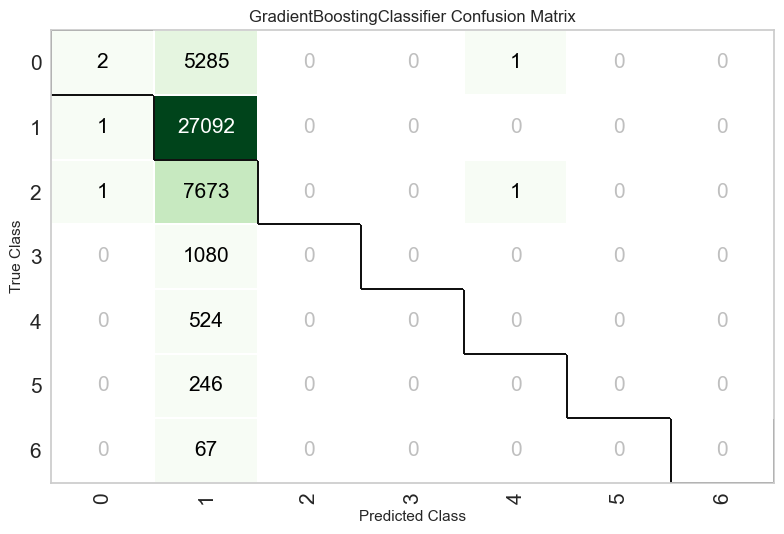

In [283]:
plot_model(gbc_clf, plot = "confusion_matrix")

In [286]:
tuned_gbc = tune_model(gbc_clf, n_iter=10,optimize='Prec.', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6470,0.5586,0.1429,0.5423,0.5085,0.0002,0.0050
1,0.6467,0.5580,0.1428,0.4459,0.5084,-0.0002,-0.0037
2,0.6467,0.5542,0.1431,0.5260,0.5090,0.0009,0.0085
Mean,0.6468,0.5569,0.1430,0.5047,0.5086,0.0003,0.0033
Std,0.0002,0.0019,0.0001,0.0421,0.0003,0.0005,0.0051


In [289]:
tuned_gbc_AUC = tune_model(tuned_gbc, n_iter=10,optimize='AUC', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6470,0.5586,0.1429,0.5423,0.5085,0.0002,0.0050
1,0.6467,0.5580,0.1428,0.4459,0.5084,-0.0002,-0.0037
2,0.6467,0.5542,0.1431,0.5260,0.5090,0.0009,0.0085
Mean,0.6468,0.5569,0.1430,0.5047,0.5086,0.0003,0.0033
Std,0.0002,0.0019,0.0001,0.0421,0.0003,0.0005,0.0051


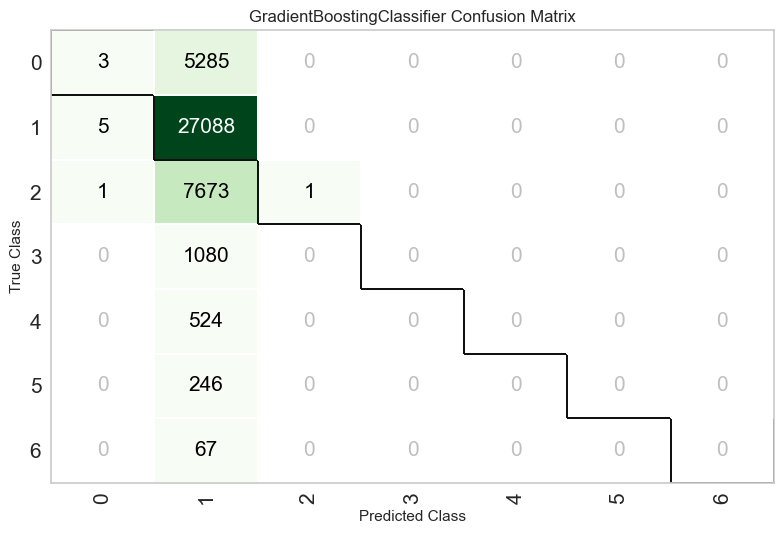

In [290]:

plot_model(tuned_gbc_AUC, plot = "confusion_matrix")


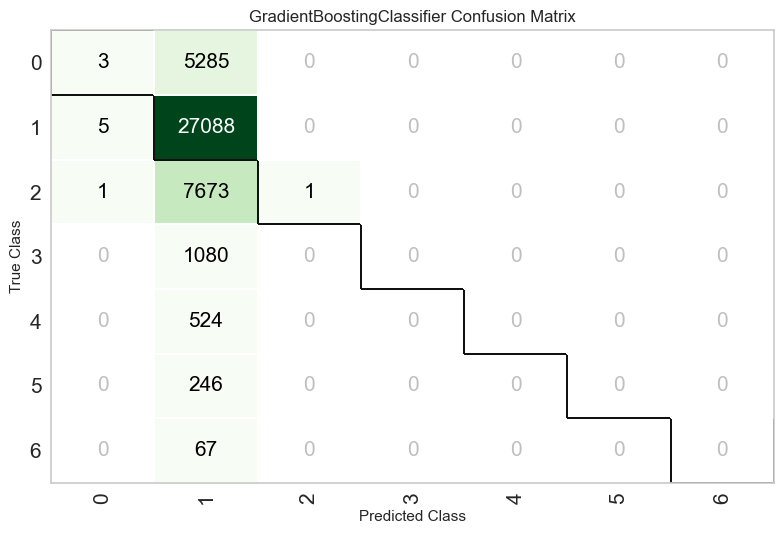

In [287]:
plot_model(tuned_gbc, plot = "confusion_matrix")

In [105]:
lightgbm_clf = pycc.create_model('lightgbm', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2516,0.5372,0.2330,0.4979,0.3137,0.0274,0.0320
1,0.2185,0.5369,0.2109,0.4986,0.2738,0.0222,0.0269
2,0.2666,0.5358,0.2280,0.4944,0.3249,0.0285,0.0329
3,0.2372,0.5376,0.2191,0.4976,0.2890,0.0271,0.0324
4,0.2301,0.5409,0.2326,0.4995,0.2740,0.0282,0.0342
Mean,0.2408,0.5377,0.2247,0.4976,0.2951,0.0267,0.0317
Std,0.0168,0.0017,0.0085,0.0017,0.0208,0.0023,0.0025


In [106]:
dummy_clf = pycc.create_model('dummy', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.1294,0.5000,0.1429,0.0167,0.0296,0.0000,0.0000
1,0.1294,0.5000,0.1429,0.0167,0.0296,0.0000,0.0000
2,0.1294,0.5000,0.1429,0.0167,0.0296,0.0000,0.0000
3,0.1294,0.5000,0.1429,0.0167,0.0296,0.0000,0.0000
4,0.1294,0.5000,0.1429,0.0167,0.0296,0.0000,0.0000
Mean,0.1294,0.5000,0.1429,0.0167,0.0296,0.0000,0.0000
Std,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [120]:
dt_clf = pycc.create_model('dt', fold = 5, class_weight = a)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2088,0.5374,0.2408,0.4957,0.2739,0.0210,0.0253
1,0.2137,0.5359,0.2276,0.5031,0.2795,0.0248,0.0298
2,0.1927,0.5384,0.2042,0.4947,0.2517,0.0169,0.0208
3,0.1929,0.5401,0.2310,0.5012,0.2496,0.0205,0.0253
4,0.2602,0.5401,0.2197,0.5007,0.3281,0.0288,0.0333
Mean,0.2137,0.5384,0.2247,0.4991,0.2766,0.0224,0.0269
Std,0.0247,0.0016,0.0123,0.0033,0.0284,0.0041,0.0043


In [121]:
tuned_dt = tune_model(dt_clf, n_iter=10,optimize='Accuracy', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4353,0.5262,0.2453,0.4365,0.4315,0.0347,0.0387
1,0.4394,0.5262,0.2159,0.4372,0.4344,0.0362,0.0401
2,0.4386,0.5263,0.2375,0.4367,0.4339,0.0347,0.0384
Mean,0.4378,0.5262,0.2329,0.4368,0.4332,0.0352,0.0391
Std,0.0018,0.0000,0.0125,0.0003,0.0013,0.0007,0.0007


In [300]:
tuned_dt_p = tune_model(dt_clf, n_iter=10,optimize='Prec.', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2571,0.5337,0.2282,0.4982,0.3230,0.0271,0.0315
1,0.2466,0.5327,0.2195,0.4887,0.3044,0.0232,0.0277
2,0.2943,0.5352,0.2478,0.4936,0.3629,0.0260,0.0290
Mean,0.2660,0.5339,0.2319,0.4935,0.3301,0.0254,0.0294
Std,0.0204,0.0010,0.0118,0.0039,0.0244,0.0016,0.0016


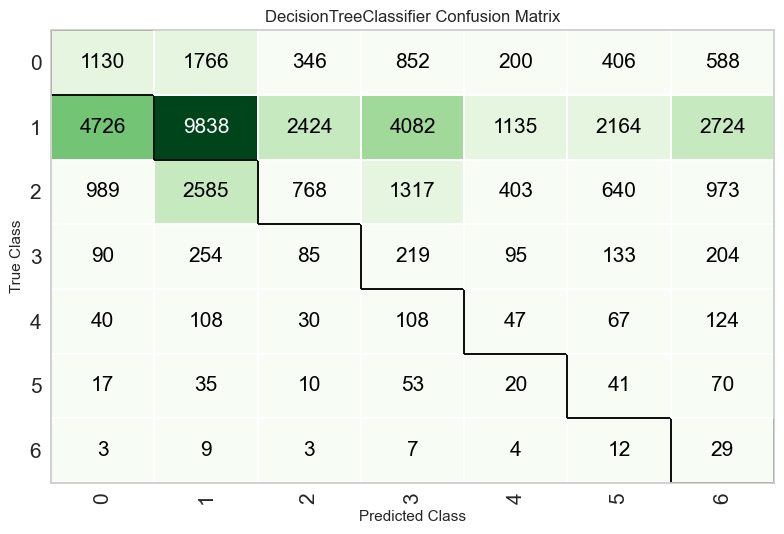

In [301]:
plot_model(tuned_dt_p, plot = "confusion_matrix")

In [149]:
voting_clf = pycc.blend_models([tuned_knn, tuned_lr, rf_bag])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6467,0.5530,0.1429,0.4182,0.5080,0.0000,0.0000
1,0.6466,0.5380,0.1429,0.4181,0.5078,0.0000,0.0000
2,0.6466,0.5376,0.1429,0.4181,0.5078,0.0000,0.0000
3,0.6466,0.5376,0.1429,0.4181,0.5078,0.0000,0.0000
4,0.6466,0.5483,0.1429,0.4181,0.5078,0.0000,0.0000
5,0.6467,0.5427,0.1429,0.4182,0.5079,0.0000,0.0000
6,0.6467,0.5547,0.1429,0.4182,0.5079,0.0000,0.0000
7,0.6467,0.5472,0.1429,0.4182,0.5079,0.0000,0.0000
8,0.6467,0.5499,0.1429,0.4182,0.5079,0.0000,0.0000


### Final Blended Model

In [303]:
voting_clf_prec = pycc.blend_models([tuned_dt_p, tuned_lr_prec, tuned_rf_prec])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2738,0.5363,0.2447,0.4947,0.3426,0.0250,0.0286
1,0.2828,0.5382,0.2527,0.4967,0.3486,0.0311,0.0352
2,0.3150,0.5398,0.2129,0.4995,0.3810,0.0320,0.0352
3,0.2758,0.5403,0.2337,0.5024,0.3431,0.0303,0.0346
4,0.2769,0.5401,0.2244,0.5039,0.3461,0.0324,0.0372
5,0.3124,0.5403,0.2302,0.5002,0.3795,0.0342,0.0377
6,0.2970,0.5349,0.2346,0.4945,0.3625,0.0291,0.0328
7,0.3145,0.5424,0.2650,0.5002,0.3809,0.0333,0.0368
8,0.3104,0.5355,0.2362,0.4893,0.3743,0.0217,0.0240


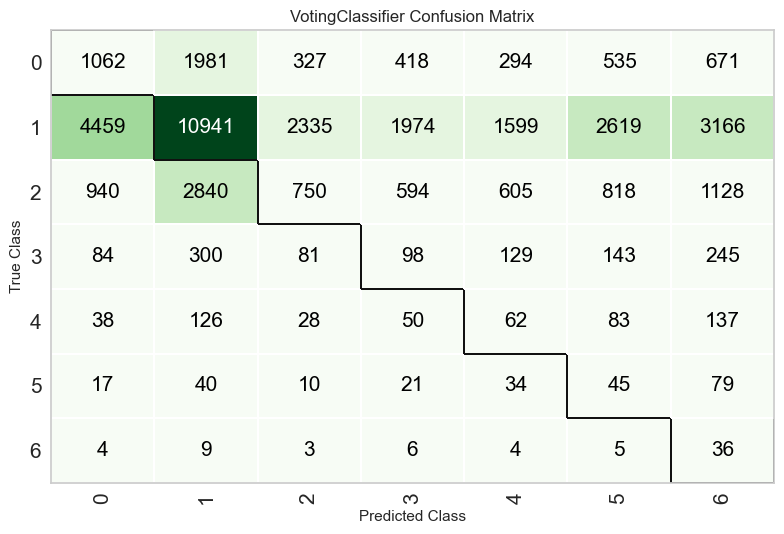

In [304]:
plot_model(voting_clf_prec, plot = "confusion_matrix")

In [151]:
pickle.dump(voting_clf, open('blend_model_knn_lr_rfbag.pkl','wb'))

In [223]:
# Loading model to compare the results
model = pickle.load(open('blend_model_knn_lr_rfbag.pkl','rb'))

In [225]:
save_model(voting_clf, 'saved_blended_model') 

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['d_month',
                                                             'Label_temp',
                                                             'Label_dew',
                                                             'Label_hum',
                                                             'Label_ws'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='FIRE_SIZE_CLASS',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 f...
                                                       

In [226]:
model_blended = load_model('saved_blended_model')

Transformation Pipeline and Model Successfully Loaded


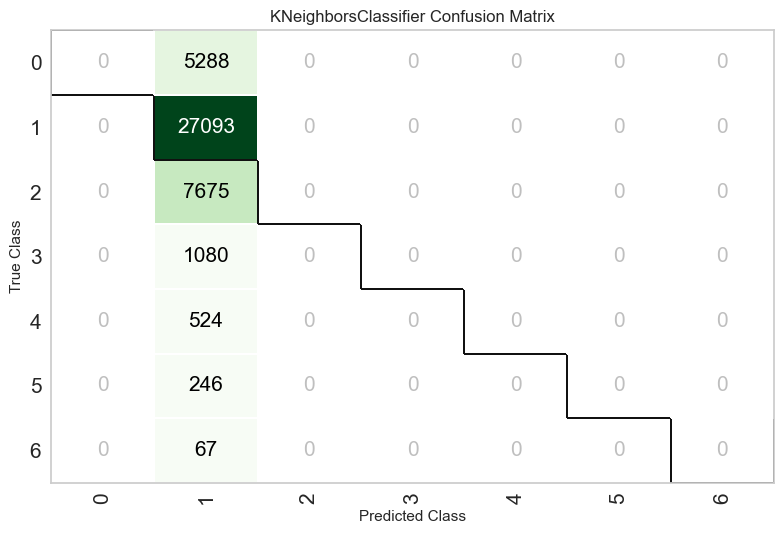

In [267]:
plot_model(tuned_knn, plot = "confusion_matrix")

### testing on 2000 file

In [202]:
df_test = pd.concat(map(pd.read_csv, [ 'fire2000_merged.csv']))

In [203]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        2627 non-null   int64  
 1   Unnamed: 0          2627 non-null   int64  
 2   FOD_ID              2627 non-null   int64  
 3   FPA_ID              2627 non-null   object 
 4   FIRE_NAME           242 non-null    object 
 5   FIRE_YEAR           2627 non-null   int64  
 6   DISCOVERY_DOY       2627 non-null   int64  
 7   DISCOVERY_TIME      2627 non-null   int64  
 8   STAT_CAUSE_CODE     2627 non-null   float64
 9   STAT_CAUSE_DESCR    2627 non-null   object 
 10  CONT_DOY            2627 non-null   int64  
 11  CONT_TIME           2627 non-null   int64  
 12  FIRE_SIZE           2627 non-null   float64
 13  FIRE_SIZE_CLASS     2627 non-null   object 
 14  LATITUDE            2627 non-null   float64
 15  LONGITUDE           2627 non-null   float64
 16  STATE 

In [204]:
df_test.head()

,Unnamed: 0.1,Unnamed: 0,FOD_ID,FPA_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,...,d_min,c_month,c_day,c_hour,c_min,temp_start,dewPointTemp_start,RelHumidity_start,Windspeed_start,FeltTemp_start
0,0,126589,127827,FS-352984,Y2K,2000,1,1330,4.0,Campfire,...,30,1,1,17,15,76.093192,59.305752,35.957638,14.322905,76.093192
1,1,126590,127828,FS-352986,DITCHLINE,2000,1,1802,9.0,Miscellaneous,...,2,1,1,18,45,75.858996,63.155530,47.006871,14.276905,75.858996
2,2,126591,127829,FS-352988,STEEL ROAD,2000,5,1330,7.0,Arson,...,30,1,5,16,0,56.619485,34.383450,28.700753,12.449001,56.619485
3,3,126592,127830,FS-352989,BAF,2000,14,1415,9.0,Miscellaneous,...,15,1,15,12,0,65.890222,34.068784,19.155381,13.547206,65.890222
4,4,126593,127831,FS-352990,LITTLE MONEY,2000,26,600,7.0,Arson,...,0,1,26,13,0,50.110379,30.224452,36.586360,10.333082,50.110379


In [205]:
# q = df["FIRE_SIZE"].quantile(0.9999)
# df = df[df["FIRE_SIZE"] < q]

In [206]:
df_test["FIRE_SIZE"].max()

47000.0

In [207]:
model_df_temp_test = df_test[['d_month','temp_start','dewPointTemp_start','RelHumidity_start','Windspeed_start','FIRE_SIZE_CLASS']]

In [208]:
model_df_temp_test.head()

,d_month,temp_start,dewPointTemp_start,RelHumidity_start,Windspeed_start,FIRE_SIZE_CLASS
0,1,76.093192,59.305752,35.957638,14.322905,B
1,1,75.858996,63.155530,47.006871,14.276905,A
2,1,56.619485,34.383450,28.700753,12.449001,B
3,1,65.890222,34.068784,19.155381,13.547206,D
4,1,50.110379,30.224452,36.586360,10.333082,C


In [209]:
model_df_temp_test.describe()

,d_month,temp_start,dewPointTemp_start,RelHumidity_start,Windspeed_start
count,2627.000000,2615.000000,2615.000000,2615.000000,2615.000000
mean,5.936429,85.097855,62.839679,36.952340,13.358633
std,3.339189,14.213647,12.188570,12.142862,3.488782
min,1.000000,43.098063,19.150834,9.921176,5.412204
25%,2.000000,74.576312,57.255890,27.710926,10.987605
50%,7.000000,88.275863,66.957026,35.251266,12.714023
75%,9.000000,97.066655,72.225512,45.738377,15.225878
max,12.000000,109.400971,78.124032,81.682256,59.314344


In [210]:
model_df_temp_test = model_df_temp_test.dropna()

In [211]:
from sklearn import preprocessing
model_df_temp_test.iloc[:,1:5] = preprocessing.normalize(model_df_temp_test.iloc[:,1:5])

In [212]:
model_df_temp_test.head()

,d_month,temp_start,dewPointTemp_start,RelHumidity_start,Windspeed_start,FIRE_SIZE_CLASS
0,1,0.732023,0.570526,0.345915,0.137787,B
1,1,0.688018,0.572801,0.426338,0.129487,A
2,1,0.772880,0.469349,0.391778,0.169934,B
3,1,0.846931,0.437909,0.246217,0.174131,D
4,1,0.718071,0.433110,0.524275,0.148071,C


In [213]:
model_df_temp_test['Label_temp'] = pd.cut(x=model_df_temp_test['temp_start'],
                     bins=[0,0.25,0.50,0.75,1],
                     labels=['vl','l','h','vh'])
model_df_temp_test['Label_dew'] = pd.cut(x=model_df_temp_test['dewPointTemp_start'],
                     bins=[0,0.25,0.50,0.75,1],
                     labels=['vl','l','h','vh'])
model_df_temp_test['Label_hum'] = pd.cut(x=model_df_temp_test['RelHumidity_start'],
                     bins=[0,0.25,0.50,0.75,1],
                     labels=['vl','l','h','vh'])
model_df_temp_test['Label_ws'] = pd.cut(x=model_df_temp_test['Windspeed_start'],
                     bins=[0,0.25,0.50,0.75,1],
                     labels=['vl','l','h','vh'])

In [214]:
model_df_temp_test.head(5)

,d_month,temp_start,dewPointTemp_start,RelHumidity_start,Windspeed_start,FIRE_SIZE_CLASS,Label_temp,Label_dew,Label_hum,Label_ws
0,1,0.732023,0.570526,0.345915,0.137787,B,h,h,l,vl
1,1,0.688018,0.572801,0.426338,0.129487,A,h,h,l,vl
2,1,0.772880,0.469349,0.391778,0.169934,B,vh,l,l,vl
3,1,0.846931,0.437909,0.246217,0.174131,D,vh,l,vl,vl
4,1,0.718071,0.433110,0.524275,0.148071,C,h,l,h,vl


In [215]:
model_df_temp_test = model_df_temp_test.drop(['temp_start','dewPointTemp_start','RelHumidity_start','Windspeed_start'], axis=1)

In [216]:
model_df_temp_test.head()

,d_month,FIRE_SIZE_CLASS,Label_temp,Label_dew,Label_hum,Label_ws
0,1,B,h,h,l,vl
1,1,A,h,h,l,vl
2,1,B,vh,l,l,vl
3,1,D,vh,l,vl,vl
4,1,C,h,l,h,vl


In [217]:
model_df_temp_test = model_df_temp_test.dropna()

In [218]:
le = LabelEncoder()
model_df_temp_test["Label_temp"] = le.fit_transform(model_df_temp_test["Label_temp"])
model_df_temp_test["Label_dew"] = le.fit_transform(model_df_temp_test["Label_dew"])
model_df_temp_test["Label_hum"] = le.fit_transform(model_df_temp_test["Label_hum"])
model_df_temp_test["Label_ws"] = le.fit_transform(model_df_temp_test["Label_ws"])
model_df_temp_test["FIRE_SIZE_CLASS"] = le.fit_transform(model_df_temp_test["FIRE_SIZE_CLASS"])


In [264]:
model_df_temp_test.head()

,d_month,FIRE_SIZE_CLASS,Label_temp,Label_dew,Label_hum,Label_ws
0,1,1,0,0,1,2
1,1,0,0,0,1,2
2,1,1,1,1,1,2
3,1,3,1,1,2,2
4,1,2,0,1,0,2


In [232]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

In [234]:
# transformer = make_column_transformer(
#     (OneHotEncoder(), ['d_month','Label_temp','Label_dew','Label_hum','Label_ws']),
#     remainder='passthrough')

# transformed = transformer.fit_transform(model_df_temp_test)
# transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())
# print(transformed_df.head())

In [235]:
categoryVariableList = ['d_month','Label_temp','Label_dew','Label_hum','Label_ws']
ohe = OneHotEncoder(categories='auto')
feature_arr = ohe.fit_transform(model_df_temp_test[categoryVariableList]).toarray()
feature_labels = ohe.get_feature_names(categoryVariableList)

# feature_labels = np.array(feature_labels).ravel()

features = pd.DataFrame(feature_arr, columns=feature_labels)
features

,d_month_1,d_month_2,d_month_3,d_month_4,d_month_5,d_month_6,d_month_7,d_month_8,d_month_9,d_month_10,...,Label_temp_0,Label_temp_1,Label_dew_0,Label_dew_1,Label_hum_0,Label_hum_1,Label_hum_2,Label_ws_0,Label_ws_1,Label_ws_2
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2610,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2611,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [236]:
features["FIRE_SIZE_CLASS"] = model_df_temp_test['FIRE_SIZE_CLASS']

In [265]:
features.head()

,d_month_1,d_month_2,d_month_3,d_month_4,d_month_5,d_month_6,d_month_7,d_month_8,d_month_9,d_month_10,...,Label_temp_1,Label_dew_0,Label_dew_1,Label_hum_0,Label_hum_1,Label_hum_2,Label_ws_0,Label_ws_1,Label_ws_2,FIRE_SIZE_CLASS
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0


In [172]:
model_df_temp_test_X = model_df_temp_test.drop('FIRE_SIZE_CLASS',axis=1)

In [174]:
model_df_temp_test_X.head()

,d_month,Label_temp,Label_dew,Label_hum,Label_ws
0,1,0,0,1,2
1,1,0,0,1,2
2,1,1,1,1,2
3,1,1,1,2,2
4,1,0,1,0,2


In [ ]:
pred_2000 = predict_model(model, data=model_df_temp_test)

In [266]:
pred_2000 = predict_model(model_blended, data=features)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\MANORAMA\anaconda3\envs\wildfire_pycaret\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\MANORAMA\AppData\Local\Temp\ipykernel_20400\3813228984.py", line 1, in <module>
    pred_2000 = predict_model(model_blended, data=features)
  File "C:\Users\MANORAMA\anaconda3\envs\wildfire_pycaret\lib\site-packages\pycaret\classification.py", line 2126, in predict_model
    return pycaret.internal.tabular.predict_model(
  File "C:\Users\MANORAMA\anaconda3\envs\wildfire_pycaret\lib\site-packages\pycaret\internal\tabular.py", line 9116, in predict_model
    pred = np.nan_to_num(estimator.predict(X_test_))
  File "C:\Users\MANORAMA\anaconda3\envs\wildfire_pycaret\lib\site-packages\sklearn\utils\metaestimators.py", line 119, in <lambda>
  File "C:\Users\MANORAMA\anaconda3\envs\wildfire_pycaret\lib\site-packages\sklearn\pipeline.py", line 407, in predict

In [194]:
# test_setup = setup(data=model_df_temp_test, target='FIRE_SIZE_CLASS', categorical_features = ['d_month','Label_temp','Label_dew','Label_hum','Label_ws'], fix_imbalance = False, n_jobs=1)

In [191]:
pred_unseen_2000 = predict_model(voting_clf, data = model_df_temp_test_X)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\MANORAMA\anaconda3\envs\wildfire_pycaret\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\MANORAMA\AppData\Local\Temp\ipykernel_20400\2273368892.py", line 1, in <module>
    pred_unseen_2000 = predict_model(voting_clf, data = model_df_temp_test_X)
  File "C:\Users\MANORAMA\anaconda3\envs\wildfire_pycaret\lib\site-packages\pycaret\classification.py", line 2126, in predict_model
    return pycaret.internal.tabular.predict_model(
  File "C:\Users\MANORAMA\anaconda3\envs\wildfire_pycaret\lib\site-packages\pycaret\internal\tabular.py", line 9116, in predict_model
    pred = np.nan_to_num(estimator.predict(X_test_))
  File "C:\Users\MANORAMA\anaconda3\envs\wildfire_pycaret\lib\site-packages\sklearn\utils\metaestimators.py", line 119, in <lambda>
  File "C:\Users\MANORAMA\anaconda3\envs\wildfire_pycaret\lib\site-packages\sklearn\pipeline.py", li

In [185]:
pred_unseen_2000

,d_month,Label_temp,Label_dew,Label_hum,Label_ws,Label,Score
0,1,0,0,1,2,1,0.5116
1,1,0,0,1,2,1,0.5116
2,1,1,1,1,2,1,0.7209
3,1,1,1,2,2,1,0.5349
4,1,0,1,0,2,1,0.6279
...,...,...,...,...,...,...,...
2622,5,1,0,2,2,1,0.6744
2623,2,1,0,2,2,1,0.8140
2624,10,1,0,1,2,1,0.6977
2625,9,1,0,2,2,1,0.6977


In [181]:
model_df_temp_test_y = model_df_temp_test['FIRE_SIZE_CLASS']

In [182]:
model_df_temp_test_y

0       1
1       0
2       1
3       3
4       2
       ..
2622    6
2623    5
2624    5
2625    5
2626    6
Name: FIRE_SIZE_CLASS, Length: 2615, dtype: int32

### Ordinal features - maybe useless

In [70]:
clf_fire_size = setup(data=model_df_temp,target='FIRE_SIZE_CLASS', categorical_features = ['d_month'], ordinal_features = {'Label_temp' : ['vl', 'l', 'h', 'vh'], 'Label_dew' : ['vl', 'l', 'h', 'vh'], 'Label_hum' : ['vl', 'l', 'h', 'vh'], 'Label_ws' : ['vl', 'l', 'h', 'vh']}, fix_imbalance=True, n_jobs=1)

,Description,Value
0,session_id,4061
1,Target,FIRE_SIZE_CLASS
2,Target Type,Multiclass
3,Label Encoded,"A: 0, B: 1, C: 2, D: 3, E: 4, F: 5, G: 6"
4,Original Data,"(137870, 6)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,5
8,Ordinal Features,True
9,High Cardinality Features,False


In [71]:
compare_models(errors='raise')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.5597,0.5228,0.1581,0.4265,0.4719,0.0061,0.0142,3.8380
gbc,Gradient Boosting Classifier,0.2665,0.5359,0.2367,0.4941,0.3252,0.0267,0.0307,259.9690
knn,K Neighbors Classifier,0.2572,0.5023,0.1430,0.4684,0.2816,0.0021,0.0027,445.5750
lightgbm,Light Gradient Boosting Machine,0.2427,0.5352,0.2237,0.4911,0.2963,0.0221,0.0261,22.0340
rf,Random Forest Classifier,0.2371,0.5340,0.2248,0.4916,0.2912,0.0217,0.0257,35.9300
et,Extra Trees Classifier,0.2328,0.5339,0.2248,0.4912,0.2855,0.0213,0.0252,50.8430
dt,Decision Tree Classifier,0.2327,0.5339,0.2248,0.4912,0.2854,0.0212,0.0252,4.3140
ada,Ada Boost Classifier,0.2272,0.5270,0.2302,0.4955,0.2826,0.0214,0.0258,15.6180
ridge,Ridge Classifier,0.2079,0.0000,0.2248,0.4961,0.2562,0.0189,0.0240,3.6720
lr,Logistic Regression,0.2002,0.5308,0.2288,0.4940,0.2441,0.0179,0.0227,33.9910


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

### All categorical

In [86]:
model_df_temp.head()

,d_month,FIRE_SIZE_CLASS,Label_temp,Label_dew,Label_hum,Label_ws
0,4,C,h,h,h,vl
1,5,D,h,vh,h,vl
2,6,C,h,vh,l,vl
3,8,C,h,vh,h,vl
4,9,D,h,vh,l,vl


In [88]:
model_df_temp = model_df_temp.dropna()

In [89]:
le = LabelEncoder()
model_df_temp["Label_temp"] = le.fit_transform(model_df_temp["Label_temp"])
model_df_temp["Label_dew"] = le.fit_transform(model_df_temp["Label_dew"])
model_df_temp["Label_hum"] = le.fit_transform(model_df_temp["Label_hum"])
model_df_temp["Label_ws"] = le.fit_transform(model_df_temp["Label_ws"])
model_df_temp["FIRE_SIZE_CLASS"] = le.fit_transform(model_df_temp["FIRE_SIZE_CLASS"])

In [42]:
model_df_temp.head()

,d_month,FIRE_SIZE_CLASS,Label_temp,Label_dew,Label_hum,Label_ws
0,4,2,0,0,0,3
1,5,3,0,2,0,3
2,6,2,0,2,1,3
3,8,2,0,2,0,3
4,9,3,0,2,1,3


In [49]:
clf_all_cat = setup(data = model_df_temp, target = 'FIRE_SIZE_CLASS', categorical_features = ['Label_temp','Label_dew','Label_hum','Label_ws'],n_jobs=1,fix_imbalance=True)

,Description,Value
0,session_id,3922
1,Target,FIRE_SIZE_CLASS
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(137870, 6)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [50]:
%%time
best = compare_models()

Wall time: 20min 6s


In [ ]:
log_reg = create_model('lr') 

IntProgress(value=0, description='Processing: ', max=4)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:10:33
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Fold,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
